In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from rethinking import laplace_approximation

# Laplace approximation

## Normal distribution

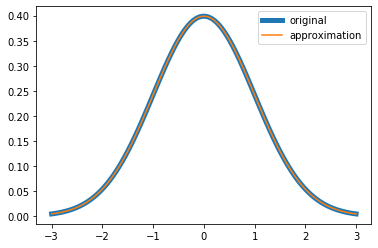

In [95]:
f = norm.pdf
(location, scale) = laplace_approximation(f)
approximation = lambda x: norm.pdf(x, location, scale)
xs = np.linspace(-3, 3, 100)
plt.plot(xs, [f(x) for x in xs], linewidth=5, label="original")
plt.plot(xs, [approximation(x) for x in xs], label="approximation")
plt.legend();

## Scaled normal distribution

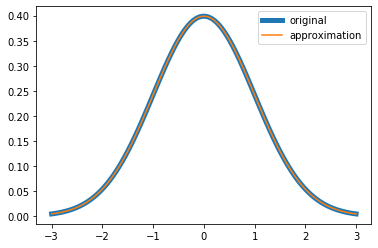

In [96]:
f = norm.pdf
(location, scale) = laplace_approximation(lambda x: 10 * f(x))
approximation = lambda x: norm.pdf(x, location, scale)
xs = np.linspace(-3, 3, 100)
plt.plot(xs, [f(x) for x in xs], linewidth=5, label="original")
plt.plot(xs, [approximation(x) for x in xs], label="approximation")
plt.legend();

## Posterior logistic regression coefficient

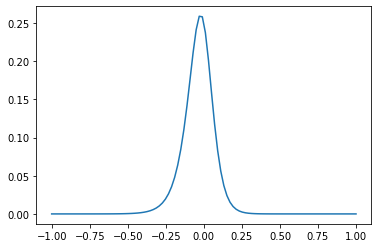

In [130]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def generate_data(b, size):
    xs = np.random.normal(0, 10, size=size)
    ps = sigmoid(b * xs)
    us = np.random.uniform(size=size)
    ys = np.where(us <= ps, 1, 0)
    return (xs, ys)

def likelihood(b, xs, ys):
    ps = sigmoid(b * xs)
    return np.prod(ps ** ys) * np.prod((1 - ps) ** (1 - ys))

b = 0.05
data = generate_data(b, size=2)
grid = np.linspace(-1, 1, 100)
plt.plot(grid, [likelihood(b, *data) for b in grid]);

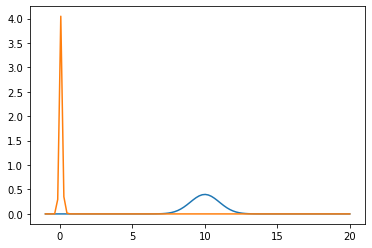

In [131]:
prior = lambda b: norm.pdf(b, 10, 1)
scaled_posterior = lambda b: likelihood(b, *data) * prior(b) 
grid = np.linspace(-1, 20, 100)
plt.plot(grid, [prior(b) for b in grid])

ys = np.array([scaled_posterior(b) for b in grid])
plt.plot(grid, ys / np.sum(ys[1:] * np.diff(grid)))  

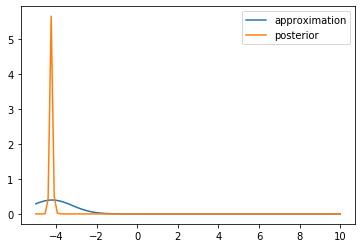

In [154]:
# The optimizer used in the Laplace approximation does not find the mode of the
# scaled posterior.
(location, scale) = laplace_approximation(scaled_posterior, -4.2, dx=0.05)
approximation = lambda x: norm.pdf(x, location, scale)
grid = np.linspace(-5, 10, 100)
plt.plot(grid, [approximation(b) for b in grid], label="approximation")
plt.plot(grid, ys / np.sum(ys[1:] * np.diff(grid)), label="posterior")
plt.legend();